# How does Charizard’s weight compare to the weights of other first generation Pokémon?


This study compares Charizard’s weight to the weights of other first-generation Pokémon. It’s an observational study because it uses existing data without changing anything. Charizard weighs 90.5 kg, which is heavier than both the average weight of about 60.4 kg and the median of about 55.4 kg. Its z-score is 0.85, placing it in the 80th percentile, meaning it’s heavier than around 80% of the original 151 Pokémon. On a histogram with a density curve, Charizard stands out as above average but not an extreme outlier. However, there are some possible biases in this study. Selection bias could happen if the dataset is missing Pokémon or their weights. Measurement bias might occur because the weights come from the games and may not be consistent or realistic. Also, since some Pokémon are extremely heavy (like Snorlax or Gyarados), the data is skewed, which can stretch the average and make it harder to compare fairly. Even though Charizard is heavier than most, these factors should be kept in mind when looking at the results.



Charizard's weight: 90.5 kg
Mean weight: 45.83 kg
Median weight: 30.00 kg
Standard Deviation: 58.07 kg
Q1: 9.50 kg, Q3: 59.00 kg, IQR: 49.50 kg
Outlier Lower Bound: -64.75 kg
Outlier Upper Bound: 133.25 kg
Z-score of Charizard: 0.77
Percentile of Charizard: 77.92%
Number of Outliers: 6


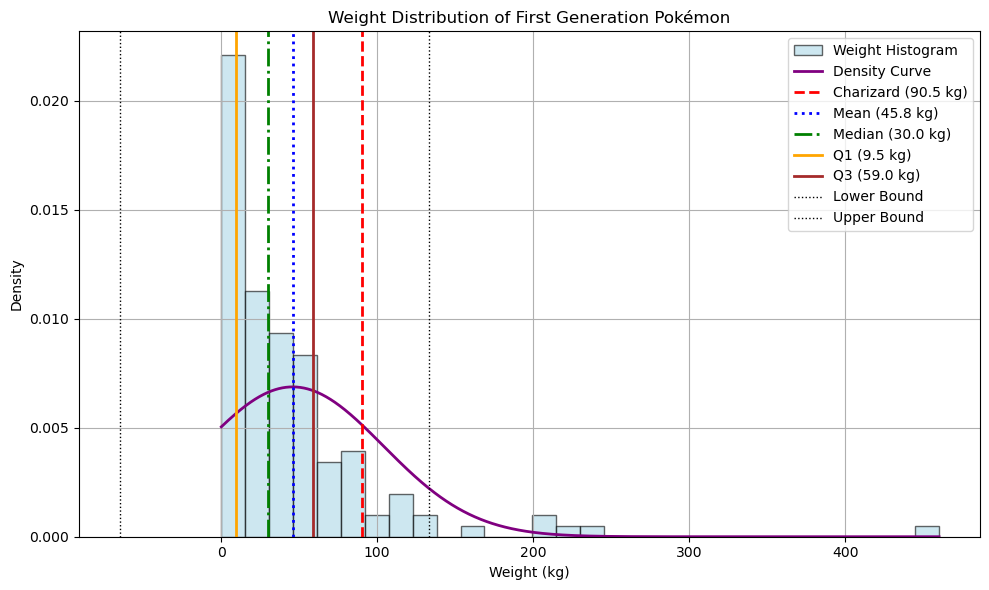


Conclusion:
Charizard weighs 90.5 kg, placing it in approximately the 77.9th percentile among first-generation Pokémon.
Its z-score of 0.77 indicates it is 0.77 standard deviations above the mean.
Charizard is not an outlier and falls within the typical weight range.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Load dataset
data = pd.read_csv('pokemon.csv')

# Filter to only Generation 1 Pokémon
gen1_data = data[data['generation'] == 1]
weights = gen1_data['weight_kg']

# Charizard's weight
charizard_weight = gen1_data.loc[gen1_data['name'] == 'Charizard', 'weight_kg'].values[0]

# Basic statistics
mean_weight = weights.mean()
median_weight = weights.median()
std_dev = weights.std()
q1 = weights.quantile(0.25)
q3 = weights.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = weights[(weights < lower_bound) | (weights > upper_bound)]

# Z-score and percentile
z_score = (charizard_weight - mean_weight) / std_dev
percentile = norm.cdf(z_score) * 100

# Print results
print(f"Charizard's weight: {charizard_weight} kg")
print(f"Mean weight: {mean_weight:.2f} kg")
print(f"Median weight: {median_weight:.2f} kg")
print(f"Standard Deviation: {std_dev:.2f} kg")
print(f"Q1: {q1:.2f} kg, Q3: {q3:.2f} kg, IQR: {iqr:.2f} kg")
print(f"Outlier Lower Bound: {lower_bound:.2f} kg")
print(f"Outlier Upper Bound: {upper_bound:.2f} kg")
print(f"Z-score of Charizard: {z_score:.2f}")
print(f"Percentile of Charizard: {percentile:.2f}%")
print(f"Number of Outliers: {len(outliers)}")

# Plot histogram and density curve
plt.figure(figsize=(10, 6))

# Histogram (normalized)
plt.hist(weights, bins=30, color='lightblue', edgecolor='black', density=True, alpha=0.6, label='Weight Histogram')

# Density curve
x_vals = np.linspace(weights.min(), weights.max(), 1000)
density = norm.pdf(x_vals, mean_weight, std_dev)
plt.plot(x_vals, density, color='purple', linewidth=2, label='Density Curve')

# Add vertical lines
plt.axvline(charizard_weight, color='red', linestyle='dashed', linewidth=2, label=f"Charizard ({charizard_weight} kg)")
plt.axvline(mean_weight, color='blue', linestyle='dotted', linewidth=2, label=f"Mean ({mean_weight:.1f} kg)")
plt.axvline(median_weight, color='green', linestyle='dashdot', linewidth=2, label=f"Median ({median_weight:.1f} kg)")
plt.axvline(q1, color='orange', linestyle='solid', linewidth=2, label=f"Q1 ({q1:.1f} kg)")
plt.axvline(q3, color='brown', linestyle='solid', linewidth=2, label=f"Q3 ({q3:.1f} kg)")
plt.axvline(lower_bound, color='black', linestyle='dotted', linewidth=1, label='Lower Bound')
plt.axvline(upper_bound, color='black', linestyle='dotted', linewidth=1, label='Upper Bound')

# Plot settings
plt.title('Weight Distribution of First Generation Pokémon')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion
print("\nConclusion:")
print(f"Charizard weighs {charizard_weight} kg, placing it in approximately the {percentile:.1f}th percentile among first-generation Pokémon.")
print(f"Its z-score of {z_score:.2f} indicates it is {abs(z_score):.2f} standard deviations {'above' if z_score > 0 else 'below'} the mean.")
if charizard_weight > upper_bound:
    print("Charizard is considered an outlier (very heavy compared to others).")
else:
    print("Charizard is not an outlier and falls within the typical weight range.")
